## NREL WIND Toolkit - HSDS Demo

This notebook demonstrates basic usage of the National Renewable Energy Laboratory (NREL) Wind Integration National Dataset (WIND) Toolkit data. The data is provided from Amazon Web Services using the HDF Group's Highly Scalable Data Service (HSDS).

For this to work you must first install h5pyd:

```
pip install --user h5pyd
```

Next you'll need to configure HSDS:

```
hsconfigure
```

and enter at the prompt:

```
hs_endpoint = https://developer.nrel.gov/api/hsds
hs_username = None
hs_password = None
hs_api_key = 3K3JQbjZmWctY0xmIfSYvYgtIcM3CN0cb1Y2w9bf
```

*The example API key here is for demonstation and is rate-limited per IP. To get your own API key, visit https://developer.nrel.gov/signup/*

You can also add the above contents to a configuration file at ~/.hscfg

In [1]:
! pip install pyproj

In [2]:
%matplotlib inline
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pyproj import Proj
import dateutil

## Basic Usage

In [3]:
# Open the wind data "file"
# server endpoint, username, password is found via a config file
f = h5pyd.File("/nrel/nsrdb/v3/nsrdb_2019.h5", 'r', bucket="nrel-pds-hsds")  

In [4]:
list(f.attrs)  # list attributes belonging to the root group

['version']

In [10]:
list(f.keys())

['air_temperature',
 'alpha',
 'aod',
 'asymmetry',
 'cld_opd_dcomp',
 'cld_reff_dcomp',
 'clearsky_dhi',
 'clearsky_dni',
 'clearsky_ghi',
 'cloud_press_acha',
 'cloud_type',
 'coordinates',
 'dew_point',
 'dhi',
 'dni',
 'fill_flag',
 'ghi',
 'meta',
 'ozone',
 'relative_humidity',
 'solar_zenith_angle',
 'ssa',
 'surface_albedo',
 'surface_pressure',
 'time_index',
 'total_precipitable_water',
 'wind_direction',
 'wind_speed']

In [5]:
f.attrs['history']   # attributes can be used to provide desriptions of the content

KeyError: 

## Datasets

In [11]:
list(f)  # list the datasets in the file

['air_temperature',
 'alpha',
 'aod',
 'asymmetry',
 'cld_opd_dcomp',
 'cld_reff_dcomp',
 'clearsky_dhi',
 'clearsky_dni',
 'clearsky_ghi',
 'cloud_press_acha',
 'cloud_type',
 'coordinates',
 'dew_point',
 'dhi',
 'dni',
 'fill_flag',
 'ghi',
 'meta',
 'ozone',
 'relative_humidity',
 'solar_zenith_angle',
 'ssa',
 'surface_albedo',
 'surface_pressure',
 'time_index',
 'total_precipitable_water',
 'wind_direction',
 'wind_speed']

In [13]:
dset = f['wind_speed']
dset.shape

(17520, 2018392)

In [14]:
dset.dtype

dtype('uint16')

In [16]:
dset.shape[0] * dset.shape[1] * 4 * 10**-12  # aprox 1 TB per dataset!

0.14144891135999998

In [17]:
dset.chunks

(2688, 372)

In [18]:
dset.chunks[0] * dset.chunks[1] * 4 * 10**-6 # aprox 1.5 MB per chunk

3.9997439999999997

## Time-slicing

Get the datetime index from the server and convert to a pandas dataframe for convenience:

In [27]:
dt = f["time_index"]
dt = pd.DataFrame({"datetime": dt[:]},index=range(0,dt.shape[0]))
dt['datetime'] = dt['datetime'].apply(dateutil.parser.parse)
display(dt.head())
display(dt.tail())

,datetime
0,2019-01-01 00:00:00
1,2019-01-01 00:30:00
2,2019-01-01 01:00:00
3,2019-01-01 01:30:00
4,2019-01-01 02:00:00


,datetime
17515,2019-12-31 21:30:00
17516,2019-12-31 22:00:00
17517,2019-12-31 22:30:00
17518,2019-12-31 23:00:00
17519,2019-12-31 23:30:00


Extract indexes for a particular span of time:

In [28]:
twentynineteen = dt.loc[(dt.datetime >= '2019-01-01') & (dt.datetime < '2020-01-01')].index
twentynineteen

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       17510, 17511, 17512, 17513, 17514, 17515, 17516, 17517, 17518, 17519],
      dtype='int64', length=17520)

Or a particular date:

In [30]:
timestep = dt.loc[dt.datetime == '2019-04-01 12:00:00'].index[0]
timestep

4344

## Map Data

In [43]:
%time data = dset[timestep, ::8]   # extract every 8th record at a particular time

CPU times: user 1.28 ms, sys: 5.24 ms, total: 6.52 ms
Wall time: 39.2 s


array([ 70,  70,  70, ..., 102, 102, 102], dtype=uint16)

MemoryError: Unable to allocate 65.9 GiB for an array with shape (17520, 2018392) and data type uint16

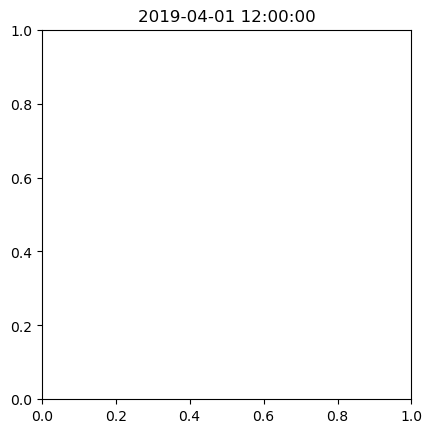

In [42]:
plt.title(str(dt.loc[timestep,"datetime"]))
plt.imshow(dset, origin="lower")

In [35]:
%time data = dset[timestep,1100:1400,2000:2400]  # full-resolution subset

TypeError: Argument sequence too long

In [ ]:
plt.imshow(data, origin="lower")

## Nearest Timeseries for given Lat/Lon

In [ ]:
Pr_long = [-67.9000015258789,
 -67.86000061035156,
 -67.22000122070312,
 -67.22000122070312,
 -67.18000030517578,
 -67.18000030517578,
 -67.18000030517578,
 -67.18000030517578,
 -67.18000030517578,
 -67.18000030517578,
 -67.18000030517578,
 -67.18000030517578,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.13999938964844,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.0999984741211,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.05999755859375,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -67.0199966430664,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.9800033569336,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.94000244140625,
 -66.9000015258789,
 -66.9000015258789,
 -66.9000015258789,
 -66.9000015258789,
 -66.9000015258789,
 -66.9000015258789,
 -66.9000015258789,
 -66.9000015258789,
 -66.9000015258789,
 -66.9000015258789,
 -66.9000015258789,
 -66.9000015258789,
 -66.9000015258789,
 -66.86000061035156,
 -66.86000061035156,
 -66.86000061035156,
 -66.86000061035156,
 -66.86000061035156,
 -66.86000061035156,
 -66.86000061035156,
 -66.86000061035156,
 -66.86000061035156,
 -66.86000061035156,
 -66.86000061035156,
 -66.86000061035156,
 -66.86000061035156,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.81999969482422,
 -66.77999877929688,
 -66.77999877929688,
 -66.77999877929688,
 -66.77999877929688,
 -66.77999877929688,
 -66.77999877929688,
 -66.77999877929688,
 -66.77999877929688,
 -66.77999877929688,
 -66.77999877929688,
 -66.77999877929688,
 -66.77999877929688,
 -66.73999786376953,
 -66.73999786376953,
 -66.73999786376953,
 -66.73999786376953,
 -66.73999786376953,
 -66.73999786376953,
 -66.73999786376953,
 -66.73999786376953,
 -66.73999786376953,
 -66.73999786376953,
 -66.73999786376953,
 -66.73999786376953,
 -66.69999694824219,
 -66.69999694824219,
 -66.69999694824219,
 -66.69999694824219,
 -66.69999694824219,
 -66.69999694824219,
 -66.69999694824219,
 -66.69999694824219,
 -66.69999694824219,
 -66.69999694824219,
 -66.69999694824219,
 -66.69999694824219,
 -66.66000366210938,
 -66.66000366210938,
 -66.66000366210938,
 -66.66000366210938,
 -66.66000366210938,
 -66.66000366210938,
 -66.66000366210938,
 -66.66000366210938,
 -66.66000366210938,
 -66.66000366210938,
 -66.66000366210938,
 -66.66000366210938,
 -66.66000366210938,
 -66.62000274658203,
 -66.62000274658203,
 -66.62000274658203,
 -66.62000274658203,
 -66.62000274658203,
 -66.62000274658203,
 -66.62000274658203,
 -66.62000274658203,
 -66.62000274658203,
 -66.62000274658203,
 -66.62000274658203,
 -66.62000274658203,
 -66.62000274658203,
 -66.58000183105469,
 -66.58000183105469,
 -66.58000183105469,
 -66.58000183105469,
 -66.58000183105469,
 -66.58000183105469,
 -66.58000183105469,
 -66.58000183105469,
 -66.58000183105469,
 -66.58000183105469,
 -66.58000183105469,
 -66.58000183105469,
 -66.58000183105469,
 -66.54000091552734,
 -66.54000091552734,
 -66.54000091552734,
 -66.54000091552734,
 -66.54000091552734,
 -66.54000091552734,
 -66.54000091552734,
 -66.54000091552734,
 -66.54000091552734,
 -66.54000091552734,
 -66.54000091552734,
 -66.54000091552734,
 -66.5,
 -66.5,
 -66.5,
 -66.5,
 -66.5,
 -66.5,
 -66.5,
 -66.5,
 -66.5,
 -66.5,
 -66.5,
 -66.5,
 -66.45999908447266,
 -66.45999908447266,
 -66.45999908447266,
 -66.45999908447266,
 -66.45999908447266,
 -66.45999908447266,
 -66.45999908447266,
 -66.45999908447266,
 -66.45999908447266,
 -66.45999908447266,
 -66.45999908447266,
 -66.45999908447266,
 -66.41999816894531,
 -66.41999816894531,
 -66.41999816894531,
 -66.41999816894531,
 -66.41999816894531,
 -66.41999816894531,
 -66.41999816894531,
 -66.41999816894531,
 -66.41999816894531,
 -66.41999816894531,
 -66.41999816894531,
 -66.41999816894531,
 -66.41999816894531,
 -66.37999725341797,
 -66.37999725341797,
 -66.37999725341797,
 -66.37999725341797,
 -66.37999725341797,
 -66.37999725341797,
 -66.37999725341797,
 -66.37999725341797,
 -66.37999725341797,
 -66.37999725341797,
 -66.37999725341797,
 -66.37999725341797,
 -66.37999725341797,
 -66.33999633789062,
 -66.33999633789062,
 -66.33999633789062,
 -66.33999633789062,
 -66.33999633789062,
 -66.33999633789062,
 -66.33999633789062,
 -66.33999633789062,
 -66.33999633789062,
 -66.33999633789062,
 -66.33999633789062,
 -66.33999633789062,
 -66.33999633789062,
 -66.30000305175781,
 -66.30000305175781,
 -66.30000305175781,
 -66.30000305175781,
 -66.30000305175781,
 -66.30000305175781,
 -66.30000305175781,
 -66.30000305175781,
 -66.30000305175781,
 -66.30000305175781,
 -66.30000305175781,
 -66.30000305175781,
 -66.30000305175781,
 -66.26000213623047,
 -66.26000213623047,
 -66.26000213623047,
 -66.26000213623047,
 -66.26000213623047,
 -66.26000213623047,
 -66.26000213623047,
 -66.26000213623047,
 -66.26000213623047,
 -66.26000213623047,
 -66.26000213623047,
 -66.26000213623047,
 -66.26000213623047,
 -66.22000122070312,
 -66.22000122070312,
 -66.22000122070312,
 -66.22000122070312,
 -66.22000122070312,
 -66.22000122070312,
 -66.22000122070312,
 -66.22000122070312,
 -66.22000122070312,
 -66.22000122070312,
 -66.22000122070312,
 -66.22000122070312,
 -66.22000122070312,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.18000030517578,
 -66.13999938964844,
 -66.13999938964844,
 -66.13999938964844,
 -66.13999938964844,
 -66.13999938964844,
 -66.13999938964844,
 -66.13999938964844,
 -66.13999938964844,
 -66.13999938964844,
 -66.13999938964844,
 -66.13999938964844,
 -66.13999938964844,
 -66.13999938964844,
 -66.0999984741211,
 -66.0999984741211,
 -66.0999984741211,
 -66.0999984741211,
 -66.0999984741211,
 -66.0999984741211,
 -66.0999984741211,
 -66.0999984741211,
 -66.0999984741211,
 -66.0999984741211,
 -66.0999984741211,
 -66.0999984741211,
 -66.0999984741211,
 -66.05999755859375,
 -66.05999755859375,
 -66.05999755859375,
 -66.05999755859375,
 -66.05999755859375,
 -66.05999755859375,
 -66.05999755859375,
 -66.05999755859375,
 -66.05999755859375,
 -66.05999755859375,
 -66.05999755859375,
 -66.05999755859375,
 -66.05999755859375,
 -66.0199966430664,
 -66.0199966430664,
 -66.0199966430664,
 -66.0199966430664,
 -66.0199966430664,
 -66.0199966430664,
 -66.0199966430664,
 -66.0199966430664,
 -66.0199966430664,
 -66.0199966430664,
 -66.0199966430664,
 -66.0199966430664,
 -65.9800033569336,
 -65.9800033569336,
 -65.9800033569336,
 -65.9800033569336,
 -65.9800033569336,
 -65.9800033569336,
 -65.9800033569336,
 -65.9800033569336,
 -65.9800033569336,
 -65.9800033569336,
 -65.9800033569336,
 -65.9800033569336,
 -65.94000244140625,
 -65.94000244140625,
 -65.94000244140625,
 -65.94000244140625,
 -65.94000244140625,
 -65.94000244140625,
 -65.94000244140625,
 -65.94000244140625,
 -65.94000244140625,
 -65.94000244140625,
 -65.94000244140625,
 -65.94000244140625,
 -65.9000015258789,
 -65.9000015258789,
 -65.9000015258789,
 -65.9000015258789,
 -65.9000015258789,
 -65.9000015258789,
 -65.9000015258789,
 -65.9000015258789,
 -65.9000015258789,
 -65.9000015258789,
 -65.9000015258789,
 -65.9000015258789,
 -65.86000061035156,
 -65.86000061035156,
 -65.86000061035156,
 -65.86000061035156,
 -65.86000061035156,
 -65.86000061035156,
 -65.86000061035156,
 -65.86000061035156,
 -65.86000061035156,
 -65.86000061035156,
 -65.86000061035156,
 -65.81999969482422,
 -65.81999969482422,
 -65.81999969482422,
 -65.81999969482422,
 -65.81999969482422,
 -65.81999969482422,
 -65.81999969482422,
 -65.81999969482422,
 -65.81999969482422,
 -65.77999877929688,
 -65.77999877929688,
 -65.77999877929688,
 -65.77999877929688,
 -65.77999877929688,
 -65.77999877929688,
 -65.77999877929688,
 -65.73999786376953,
 -65.73999786376953,
 -65.73999786376953,
 -65.73999786376953,
 -65.73999786376953,
 -65.69999694824219,
 -65.69999694824219,
 -65.69999694824219,
 -65.69999694824219,
 -65.66000366210938,
 -65.66000366210938,
 -65.66000366210938,
 -65.66000366210938,
 -65.62000274658203,
 -65.54000091552734,
 -65.5,
 -65.5,
 -65.45999908447266,
 -65.41999816894531,
 -65.37999725341797,
 -65.33999633789062,
 -65.30000305175781]

In [ ]:
Pr_lat = [18.09000015258789,
 18.09000015258789,
 18.3700008392334,
 18.329999923706055,
 18.329999923706055,
 18.3700008392334,
 18.25,
 18.290000915527344,
 18.1299991607666,
 17.969999313354492,
 18.049999237060547,
 18.09000015258789,
 18.40999984741211,
 18.3700008392334,
 18.1299991607666,
 18.170000076293945,
 18.209999084472656,
 18.049999237060547,
 17.969999313354492,
 18.010000228881836,
 18.25,
 18.290000915527344,
 18.450000762939453,
 18.489999771118164,
 18.329999923706055,
 18.09000015258789,
 18.329999923706055,
 18.3700008392334,
 18.40999984741211,
 18.290000915527344,
 18.209999084472656,
 18.170000076293945,
 18.489999771118164,
 18.450000762939453,
 18.25,
 18.1299991607666,
 18.09000015258789,
 18.049999237060547,
 18.010000228881836,
 17.969999313354492,
 18.09000015258789,
 17.969999313354492,
 18.290000915527344,
 18.1299991607666,
 18.489999771118164,
 18.40999984741211,
 18.450000762939453,
 18.049999237060547,
 18.170000076293945,
 18.010000228881836,
 18.209999084472656,
 18.3700008392334,
 18.329999923706055,
 18.25,
 18.25,
 18.290000915527344,
 18.010000228881836,
 18.40999984741211,
 18.1299991607666,
 18.209999084472656,
 18.170000076293945,
 18.049999237060547,
 17.969999313354492,
 18.329999923706055,
 18.3700008392334,
 18.450000762939453,
 18.489999771118164,
 18.09000015258789,
 18.1299991607666,
 18.489999771118164,
 18.450000762939453,
 18.329999923706055,
 18.049999237060547,
 18.010000228881836,
 17.969999313354492,
 18.40999984741211,
 18.3700008392334,
 18.209999084472656,
 18.25,
 18.170000076293945,
 18.09000015258789,
 18.290000915527344,
 18.290000915527344,
 18.329999923706055,
 18.40999984741211,
 18.450000762939453,
 18.1299991607666,
 18.170000076293945,
 18.209999084472656,
 18.25,
 18.09000015258789,
 18.3700008392334,
 18.049999237060547,
 18.010000228881836,
 17.969999313354492,
 17.93000030517578,
 18.290000915527344,
 18.25,
 18.450000762939453,
 18.329999923706055,
 18.3700008392334,
 18.049999237060547,
 17.969999313354492,
 18.010000228881836,
 18.209999084472656,
 18.40999984741211,
 18.170000076293945,
 18.09000015258789,
 18.1299991607666,
 18.09000015258789,
 18.010000228881836,
 17.969999313354492,
 18.049999237060547,
 18.170000076293945,
 18.329999923706055,
 18.3700008392334,
 18.290000915527344,
 18.25,
 18.209999084472656,
 18.1299991607666,
 18.450000762939453,
 18.40999984741211,
 18.010000228881836,
 18.049999237060547,
 17.969999313354492,
 18.09000015258789,
 18.450000762939453,
 18.170000076293945,
 18.209999084472656,
 18.290000915527344,
 18.40999984741211,
 18.3700008392334,
 18.329999923706055,
 18.25,
 18.1299991607666,
 18.489999771118164,
 18.209999084472656,
 18.170000076293945,
 18.09000015258789,
 18.329999923706055,
 18.290000915527344,
 18.25,
 18.049999237060547,
 18.010000228881836,
 18.1299991607666,
 18.450000762939453,
 18.40999984741211,
 18.3700008392334,
 18.450000762939453,
 18.049999237060547,
 18.010000228881836,
 18.209999084472656,
 18.170000076293945,
 18.290000915527344,
 18.25,
 18.1299991607666,
 18.09000015258789,
 18.40999984741211,
 18.3700008392334,
 18.329999923706055,
 18.450000762939453,
 18.010000228881836,
 18.049999237060547,
 18.170000076293945,
 18.209999084472656,
 18.09000015258789,
 18.1299991607666,
 18.40999984741211,
 18.3700008392334,
 18.329999923706055,
 18.25,
 18.290000915527344,
 18.450000762939453,
 18.049999237060547,
 18.010000228881836,
 18.489999771118164,
 18.1299991607666,
 18.09000015258789,
 18.170000076293945,
 18.209999084472656,
 18.25,
 18.290000915527344,
 18.329999923706055,
 18.3700008392334,
 18.40999984741211,
 17.969999313354492,
 18.049999237060547,
 18.010000228881836,
 18.450000762939453,
 18.40999984741211,
 18.290000915527344,
 18.25,
 18.209999084472656,
 18.1299991607666,
 18.09000015258789,
 18.170000076293945,
 18.3700008392334,
 18.329999923706055,
 18.40999984741211,
 18.329999923706055,
 18.290000915527344,
 18.209999084472656,
 18.1299991607666,
 18.170000076293945,
 18.25,
 18.3700008392334,
 18.09000015258789,
 18.049999237060547,
 18.010000228881836,
 17.969999313354492,
 18.450000762939453,
 18.329999923706055,
 18.209999084472656,
 18.25,
 18.3700008392334,
 18.09000015258789,
 18.170000076293945,
 18.1299991607666,
 18.290000915527344,
 18.40999984741211,
 18.010000228881836,
 18.049999237060547,
 18.450000762939453,
 18.209999084472656,
 18.25,
 18.3700008392334,
 18.40999984741211,
 18.329999923706055,
 18.290000915527344,
 18.09000015258789,
 18.170000076293945,
 18.450000762939453,
 18.010000228881836,
 18.049999237060547,
 18.1299991607666,
 18.3700008392334,
 18.40999984741211,
 18.329999923706055,
 18.25,
 18.209999084472656,
 18.290000915527344,
 18.09000015258789,
 18.170000076293945,
 18.450000762939453,
 18.1299991607666,
 18.049999237060547,
 18.010000228881836,
 18.40999984741211,
 18.3700008392334,
 18.1299991607666,
 18.09000015258789,
 18.170000076293945,
 17.969999313354492,
 18.010000228881836,
 18.450000762939453,
 18.290000915527344,
 18.25,
 18.209999084472656,
 18.049999237060547,
 18.329999923706055,
 18.1299991607666,
 18.09000015258789,
 18.170000076293945,
 17.969999313354492,
 18.329999923706055,
 18.3700008392334,
 18.40999984741211,
 18.010000228881836,
 18.290000915527344,
 18.049999237060547,
 18.25,
 18.450000762939453,
 18.209999084472656,
 18.010000228881836,
 18.3700008392334,
 18.209999084472656,
 18.25,
 18.290000915527344,
 18.40999984741211,
 18.329999923706055,
 17.969999313354492,
 18.049999237060547,
 18.450000762939453,
 18.09000015258789,
 18.170000076293945,
 18.1299991607666,
 18.049999237060547,
 17.969999313354492,
 18.450000762939453,
 18.010000228881836,
 18.1299991607666,
 18.09000015258789,
 18.170000076293945,
 18.40999984741211,
 18.3700008392334,
 18.329999923706055,
 18.290000915527344,
 18.25,
 18.209999084472656,
 18.450000762939453,
 18.170000076293945,
 18.1299991607666,
 18.09000015258789,
 17.969999313354492,
 18.010000228881836,
 18.049999237060547,
 18.25,
 18.329999923706055,
 18.40999984741211,
 18.209999084472656,
 18.3700008392334,
 18.290000915527344,
 18.049999237060547,
 17.969999313354492,
 18.010000228881836,
 18.3700008392334,
 18.40999984741211,
 18.450000762939453,
 18.170000076293945,
 18.1299991607666,
 18.09000015258789,
 18.329999923706055,
 18.290000915527344,
 18.25,
 18.209999084472656,
 18.170000076293945,
 18.049999237060547,
 18.09000015258789,
 18.450000762939453,
 18.40999984741211,
 18.3700008392334,
 18.290000915527344,
 18.25,
 18.329999923706055,
 18.209999084472656,
 18.1299991607666,
 18.010000228881836,
 17.969999313354492,
 17.93000030517578,
 18.450000762939453,
 18.209999084472656,
 18.09000015258789,
 18.1299991607666,
 18.170000076293945,
 18.3700008392334,
 18.329999923706055,
 18.40999984741211,
 18.25,
 18.290000915527344,
 17.969999313354492,
 18.010000228881836,
 18.049999237060547,
 18.1299991607666,
 18.290000915527344,
 18.25,
 18.329999923706055,
 18.09000015258789,
 18.40999984741211,
 18.209999084472656,
 18.3700008392334,
 18.049999237060547,
 18.010000228881836,
 17.969999313354492,
 18.170000076293945,
 18.450000762939453,
 18.010000228881836,
 18.049999237060547,
 17.969999313354492,
 18.450000762939453,
 18.09000015258789,
 18.209999084472656,
 18.290000915527344,
 18.3700008392334,
 18.40999984741211,
 18.25,
 18.329999923706055,
 18.1299991607666,
 18.170000076293945,
 18.40999984741211,
 18.3700008392334,
 18.329999923706055,
 18.25,
 18.209999084472656,
 18.049999237060547,
 17.969999313354492,
 18.09000015258789,
 18.1299991607666,
 18.170000076293945,
 18.290000915527344,
 18.010000228881836,
 18.290000915527344,
 18.329999923706055,
 18.3700008392334,
 18.40999984741211,
 18.049999237060547,
 18.010000228881836,
 18.170000076293945,
 18.450000762939453,
 18.1299991607666,
 18.09000015258789,
 18.209999084472656,
 18.25,
 18.170000076293945,
 18.25,
 18.290000915527344,
 18.329999923706055,
 18.3700008392334,
 18.40999984741211,
 18.209999084472656,
 17.969999313354492,
 18.010000228881836,
 18.049999237060547,
 18.09000015258789,
 18.1299991607666,
 18.010000228881836,
 18.3700008392334,
 18.329999923706055,
 18.290000915527344,
 18.25,
 18.209999084472656,
 18.40999984741211,
 18.1299991607666,
 18.09000015258789,
 18.170000076293945,
 18.450000762939453,
 18.049999237060547,
 18.049999237060547,
 18.010000228881836,
 18.170000076293945,
 18.209999084472656,
 18.329999923706055,
 18.3700008392334,
 18.40999984741211,
 18.290000915527344,
 18.25,
 18.09000015258789,
 18.1299991607666,
 18.09000015258789,
 18.1299991607666,
 18.290000915527344,
 18.329999923706055,
 18.3700008392334,
 18.40999984741211,
 18.25,
 18.209999084472656,
 18.170000076293945,
 18.290000915527344,
 18.1299991607666,
 18.3700008392334,
 18.329999923706055,
 18.25,
 18.209999084472656,
 18.170000076293945,
 18.209999084472656,
 18.3700008392334,
 18.329999923706055,
 18.25,
 18.290000915527344,
 18.329999923706055,
 18.25,
 18.290000915527344,
 18.209999084472656,
 18.290000915527344,
 18.209999084472656,
 18.25,
 18.329999923706055,
 18.25,
 18.09000015258789,
 18.1299991607666,
 18.09000015258789,
 18.1299991607666,
 18.1299991607666,
 18.1299991607666,
 18.1299991607666,
 18.329999923706055]

In [ ]:
# This function finds the nearest x/y indices for a given lat/lon.
# Rather than fetching the entire coordinates database, which is 500+ MB, this
# uses the Proj4 library to find a nearby point and then converts to x/y indices
def indicesForCoord(f, lat_index, lon_index):
    dset_coords = f['coordinates']
    projstring = """+proj=lcc +lat_1=30 +lat_2=60 
                    +lat_0=38.47240422490422 +lon_0=-96.0 
                    +x_0=0 +y_0=0 +ellps=sphere 
                    +units=m +no_defs """
    projectLcc = Proj(projstring)
    origin_ll = reversed(dset_coords[0][0])  # Grab origin directly from database
    origin = projectLcc(*origin_ll)
    
    coords = (lon_index,lat_index)
    coords = projectLcc(*coords)
    delta = np.subtract(coords, origin)
    ij = [int(round(x/2000)) for x in delta]
    return tuple(reversed(ij))

NewYorkCity = (40.7128, -74.0059)
NewYorkCity_idx = indicesForCoord( f, NewYorkCity[0], NewYorkCity[1] )

print("y,x indices for New York City: \t\t {}".format(NewYorkCity_idx))
print("Coordinates of New York City: \t {}".format(NewYorkCity))
print("Coordinates of nearest point: \t {}".format(f["coordinates"][NewYorkCity_idx[0]][NewYorkCity_idx[1]]))

In [ ]:
f['coordinates']

In [ ]:
PR = (Pr_lat[0], Pr_long[0])
PR_idx = indicesForCoord( f, PR[0], PR[1] )

print("y,x indices for PR: \t\t {}".format(PR_idx))
print("Coordinates of PR: \t {}".format(PR))
print("Coordinates of nearest point: \t {}".format(f["coordinates"][PR_idx[0]][PR_idx[1]]))

In [ ]:
# Get the entire 2010 timeseries data for a point in NYC
%time tseries = dset[min(twentynineteen):max(twentynineteen)+1, NewYorkCity_idx[0], NewYorkCity_idx[1]]

In [ ]:
len(tseries)   # 1 years * 365 days * 24 hours 

In [ ]:
plt.plot(dt.iloc[twentynineteen,].datetime, tseries)
plt.ylabel("Windspeed at 100m (m/s)")
plt.title("NYC Windspeed in 2010")

In [ ]:
# Fetch full timeseries data for all seven years
LongsPeak_idx = indicesForCoord(f, 40.2549, -105.6160)
%time tseries = dset[:,LongsPeak_idx[0],LongsPeak_idx[1]]

In [ ]:
plt.plot(dt.datetime, tseries)
plt.ylabel("Windspeed at 100m (m/s)")
plt.title("Longs Peak Windspeed 2007-2013")

## Windspeed Statistics

In [ ]:
dt["windspeed"] = tseries
dt["year"] = dt["datetime"].apply(lambda x: x.year)
dt["month"] = dt["datetime"].apply(lambda x: x.month)
dt["day"] = dt["datetime"].apply(lambda x: x.day)
dt["hour"] = dt["datetime"].apply(lambda x: x.hour)

In [ ]:
agg = dt.groupby(["month","hour"]).mean()
agg = agg.reset_index().pivot(index="month",columns="hour",values="windspeed")
agg

In [ ]:
plt.imshow(agg)
plt.xlabel("Hour")
plt.ylabel("Month")
plt.title("12 x 24 Mean Windspeed (m/s)")
plt.colorbar()